## G2M EDA for cab investment firms 

### Part 1: Importing relevent libraries and cleaning the datasets provided. 


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

import warnings
warnings.filterwarnings('ignore')

### Importing the data files, cleaning and merging the necessary into a master dataset:

In [2]:
cust = pd.read_csv("Customer_ID.csv")

In [3]:
cust.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [4]:
trans = pd.read_csv("transaction_ID.csv")

In [5]:
trans.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [6]:
cab = pd.read_csv("cab_data.csv")

In [7]:
cab.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [8]:
city = pd.read_csv("city.csv")

In [9]:
city.head()

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


#### Finding out more about the data types in each file, and converting the features into the necessary format

In [10]:
cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [11]:
cust.dtypes

Customer ID            int64
Gender                object
Age                    int64
Income (USD/Month)     int64
dtype: object

In [12]:
trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Transaction ID  440098 non-null  int64 
 1   Customer ID     440098 non-null  int64 
 2   Payment_Mode    440098 non-null  object
dtypes: int64(2), object(1)
memory usage: 10.1+ MB


In [13]:
trans.dtypes

Transaction ID     int64
Customer ID        int64
Payment_Mode      object
dtype: object

In [14]:
cab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  int64  
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 19.2+ MB


In [15]:
cab.dtypes

Transaction ID      int64
Date of Travel      int64
Company            object
City               object
KM Travelled      float64
Price Charged     float64
Cost of Trip      float64
dtype: object

In [16]:
city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 608.0+ bytes


In [17]:
city.dtypes

City          object
Population    object
Users         object
dtype: object

#### The date of travel in cab dataset needs to changed into a date-time format

In [18]:
cab["Date of Travel"].min()

42371

In [19]:
ab = cab['Date of Travel'].min()

In [20]:
base_date = pd.Timestamp('28-01-1900')

In [21]:
dates = base_date + pd.DateOffset(ab)

In [22]:
dates

Timestamp('2016-01-31 00:00:00')

In [23]:
dates.strftime('%d/%m/%Y')

'31/01/2016'

In [24]:
dates1 = list(cab['Date of Travel'])

In [25]:
t_dates = [base_date + pd.DateOffset(a) for a in dates1]

In [26]:
t_dates = [d.strftime('%d/%m/%Y') for d in t_dates]

In [27]:
cab['Date of Travel'] = t_dates

In [28]:
check = cab.loc[cab['Date of Travel'] == '31/01/2016']
check

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
2,10000013,31/01/2016,Pink Cab,ATLANTA GA,9.04,125.20,97.632
18,10000029,31/01/2016,Pink Cab,BOSTON MA,21.34,324.21,226.204
19,10000030,31/01/2016,Pink Cab,BOSTON MA,41.30,646.06,454.300
30,10000041,31/01/2016,Pink Cab,CHICAGO IL,35.02,598.43,406.232
34,10000045,31/01/2016,Pink Cab,CHICAGO IL,3.24,48.04,33.696
...,...,...,...,...,...,...,...
1056,10001366,31/01/2016,Yellow Cab,WASHINGTON DC,34.88,737.78,418.560
1060,10001370,31/01/2016,Yellow Cab,WASHINGTON DC,39.96,946.88,551.448
1063,10001373,31/01/2016,Yellow Cab,WASHINGTON DC,18.08,392.04,216.960
1068,10001378,31/01/2016,Yellow Cab,WASHINGTON DC,5.25,115.74,69.930


In [29]:
#Changing population and users to integers
city['Population'] = [i.replace(',','') for i in city['Population']]
city['Population'] = city['Population'].astype(int)


In [30]:
#Changing population and users to integers
city['Users'] = [i.replace(',','') for i in city['Users']]
city['Users'] = city['Users'].astype(int)

In [31]:
city

,City,Population,Users
0,NEW YORK NY,8405837,302149
1,CHICAGO IL,1955130,164468
2,LOS ANGELES CA,1595037,144132
3,MIAMI FL,1339155,17675
4,SILICON VALLEY,1177609,27247
5,ORANGE COUNTY,1030185,12994
6,SAN DIEGO CA,959307,69995
7,PHOENIX AZ,943999,6133
8,DALLAS TX,942908,22157
9,ATLANTA GA,814885,24701


## 2. Merging the dataset and exploring the master dataset
Using merge from pandas as the column names can be used to merge two dataframes, which is more versatile than compared to using join

In [32]:
df_cust = cust.copy()
df_cab = cab.copy()
df_trans = trans.copy()
df_city = city.copy()

In [33]:
df_cust_trans = pd.merge(df_cust, df_trans, on = 'Customer ID')

In [34]:
df_cust_trans

,Customer ID,Gender,Age,Income (USD/Month),Transaction ID,Payment_Mode
0,29290,Male,28,10813,10000011,Card
1,29290,Male,28,10813,10351127,Cash
2,29290,Male,28,10813,10412921,Card
3,27703,Male,27,9237,10000012,Card
4,27703,Male,27,9237,10320494,Card
...,...,...,...,...,...,...
440093,12490,Male,33,18713,10439799,Cash
440094,14971,Male,30,15346,10439820,Card
440095,41414,Male,38,3960,10439838,Card
440096,41677,Male,23,19454,10439840,Cash


In [35]:
df_ctc = pd.merge(df_cust_trans, df_cab, on = 'Transaction ID')

In [36]:
df_ctc

,Customer ID,Gender,Age,Income (USD/Month),Transaction ID,Payment_Mode,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,29290,Male,28,10813,10000011,Card,06/02/2016,Pink Cab,ATLANTA GA,30.45,370.95,313.6350
1,29290,Male,28,10813,10351127,Cash,19/08/2018,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228
2,29290,Male,28,10813,10412921,Card,22/12/2018,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020
3,27703,Male,27,9237,10000012,Card,04/02/2016,Pink Cab,ATLANTA GA,28.62,358.52,334.8540
4,27703,Male,27,9237,10320494,Card,20/05/2018,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192
...,...,...,...,...,...,...,...,...,...,...,...,...
359387,38520,Female,42,19417,10439790,Card,05/02/2018,Yellow Cab,SEATTLE WA,16.66,261.18,213.9144
359388,12490,Male,33,18713,10439799,Cash,01/02/2018,Yellow Cab,SILICON VALLEY,13.72,277.97,172.8720
359389,41414,Male,38,3960,10439838,Card,02/02/2018,Yellow Cab,TUCSON AZ,19.00,303.77,232.5600
359390,41677,Male,23,19454,10439840,Cash,04/02/2018,Yellow Cab,TUCSON AZ,5.60,92.42,70.5600


In [37]:
main_df = df_ctc.copy()

#### Merging city dataset into the main frame does not have meaning to it as it is not directly connected to one individual ID

In [38]:
main_df['Profit'] = main_df['Price Charged'] - main_df['Cost of Trip']


In [39]:
check_nan = main_df.isnull().values.any()

In [40]:
check_nan

False

There are no null values in the main dataframe. 

## 3. EDA starts here

In [41]:
city

,City,Population,Users
0,NEW YORK NY,8405837,302149
1,CHICAGO IL,1955130,164468
2,LOS ANGELES CA,1595037,144132
3,MIAMI FL,1339155,17675
4,SILICON VALLEY,1177609,27247
5,ORANGE COUNTY,1030185,12994
6,SAN DIEGO CA,959307,69995
7,PHOENIX AZ,943999,6133
8,DALLAS TX,942908,22157
9,ATLANTA GA,814885,24701


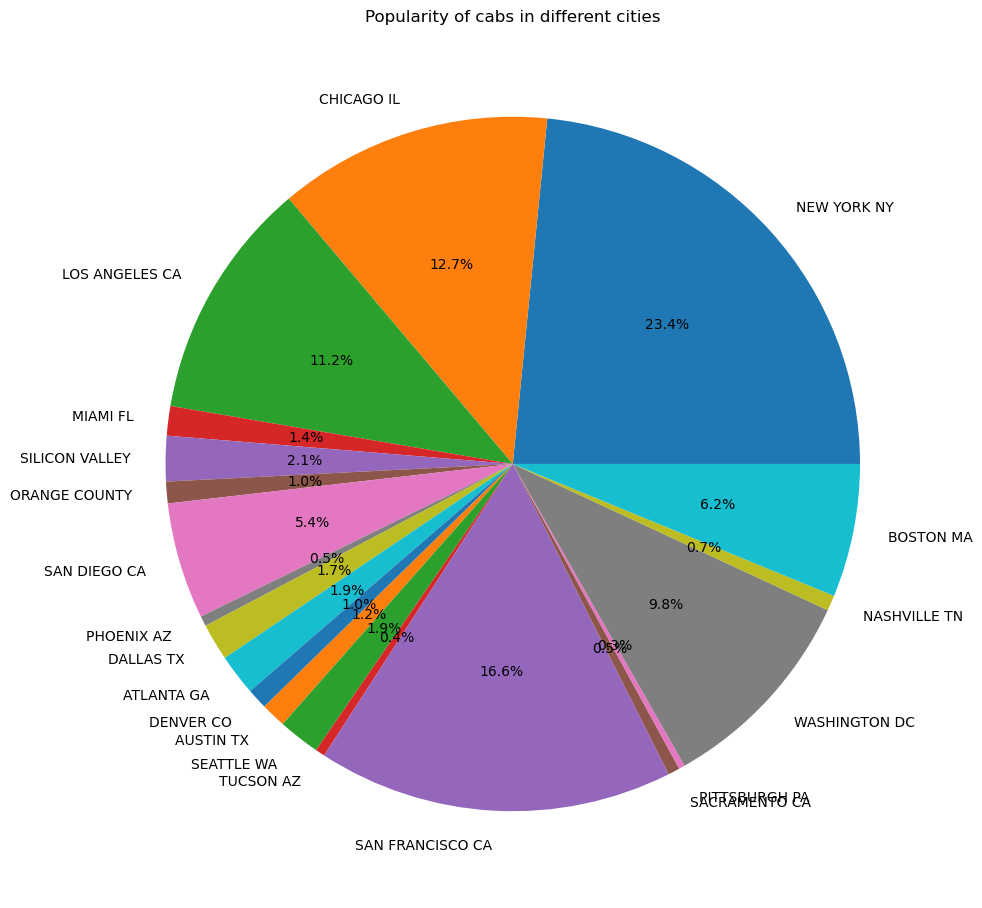

In [42]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.pie(city['Users'], labels=city['City'], autopct='%.1f%%')
ax.set_title('Popularity of cabs in different cities')
plt.tight_layout()

In [43]:
main_df['Age'].min()

18

In [44]:
main_df

,Customer ID,Gender,Age,Income (USD/Month),Transaction ID,Payment_Mode,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Profit
0,29290,Male,28,10813,10000011,Card,06/02/2016,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,57.3150
1,29290,Male,28,10813,10351127,Cash,19/08/2018,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,281.2772
2,29290,Male,28,10813,10412921,Card,22/12/2018,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,194.6480
3,27703,Male,27,9237,10000012,Card,04/02/2016,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,23.6660
4,27703,Male,27,9237,10320494,Card,20/05/2018,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,253.9808
...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,38520,Female,42,19417,10439790,Card,05/02/2018,Yellow Cab,SEATTLE WA,16.66,261.18,213.9144,47.2656
359388,12490,Male,33,18713,10439799,Cash,01/02/2018,Yellow Cab,SILICON VALLEY,13.72,277.97,172.8720,105.0980
359389,41414,Male,38,3960,10439838,Card,02/02/2018,Yellow Cab,TUCSON AZ,19.00,303.77,232.5600,71.2100
359390,41677,Male,23,19454,10439840,Cash,04/02/2018,Yellow Cab,TUCSON AZ,5.60,92.42,70.5600,21.8600


In [45]:
df = main_df[['Company', 'Customer ID', 'Gender', 'KM Travelled', 'Profit', 'City']]

In [46]:
df_pink = df.loc[df['Company']=='Pink Cab']
df_yellow = df.loc[df['Company']=='Yellow Cab']

In [47]:
df_pink

,Company,Customer ID,Gender,KM Travelled,Profit,City
0,Pink Cab,29290,Male,30.45,57.315,ATLANTA GA
3,Pink Cab,27703,Male,28.62,23.666,ATLANTA GA
6,Pink Cab,27703,Male,13.39,25.096,ATLANTA GA
7,Pink Cab,28712,Male,9.04,27.568,ATLANTA GA
11,Pink Cab,28020,Male,33.17,25.798,ATLANTA GA
...,...,...,...,...,...,...
359331,Pink Cab,47760,Male,31.03,91.627,SACRAMENTO CA
359332,Pink Cab,18620,Male,26.73,39.108,SAN DIEGO CA
359333,Pink Cab,14974,Male,22.23,121.593,SILICON VALLEY
359334,Pink Cab,41135,Female,35.96,80.594,TUCSON AZ


In [48]:
df_upin = df_pink.iloc[df_pink['Customer ID'].unique()]
df_uyel = df_yellow.iloc[df_yellow['Customer ID'].unique()]

In [49]:
len(df_yellow['Customer ID'].unique())

39896

In [50]:
d = {'Company': ['Yellow Cabs', 'Pink Cabs'], 'Total Users': [len(df_yellow['Customer ID'].unique()), len(df_pink['Customer ID'].unique())]}
tot_df = pd.DataFrame(data=d)

In [51]:
tot_df

,Company,Total Users
0,Yellow Cabs,39896
1,Pink Cabs,32330


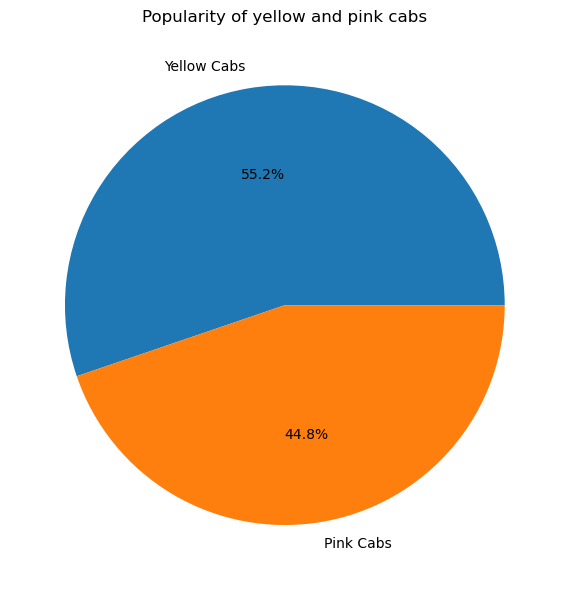

In [52]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.pie(tot_df['Total Users'], labels=tot_df['Company'], autopct='%.1f%%')
ax.set_title('Popularity of yellow and pink cabs')
plt.tight_layout()

In [53]:
g_yellow=df_uyel.loc[df_uyel['Gender'] == 'Female'].count()
m_yellow=df_uyel.loc[df_uyel['Gender'] == 'Male'].count()

print(g_yellow[1], m_yellow[1])

4399 35497


In [54]:
g_pink=df_upin.loc[df_upin['Gender'] == 'Female'].count()
m_pink=df_upin.loc[df_upin['Gender'] == 'Male'].count()



In [55]:
d = {'Company': ['Yellow Cabs', 'Pink Cabs'], 'Female users': [g_yellow[1], g_pink[1]]}
f_diff = pd.DataFrame(data=d)

d = {'Company': ['Yellow Cabs', 'Pink Cabs'], 'Male users': [m_yellow[1], m_pink[1]]}
m_diff = pd.DataFrame(data=d)

d = {'Gender': ['Male', 'Female'], 'Users': [m_yellow[1], g_yellow[1]]}
y_diff = pd.DataFrame(data=d)

d = {'Gender': ['Male', 'Female'], 'Users': [m_pink[1], g_pink[1]]}
p_diff = pd.DataFrame(data=d)

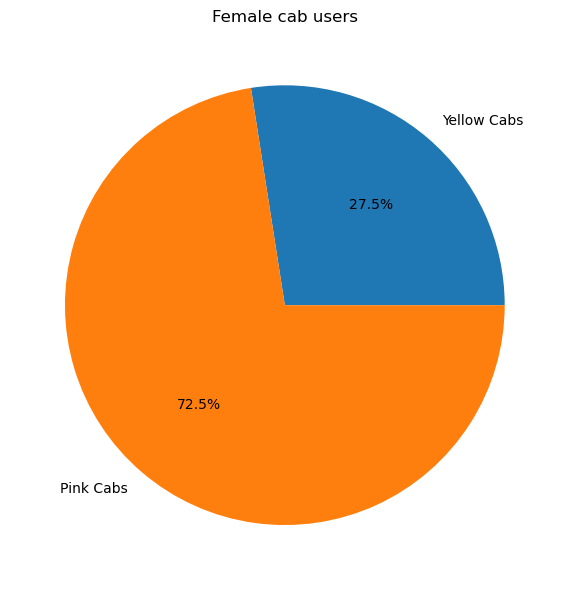

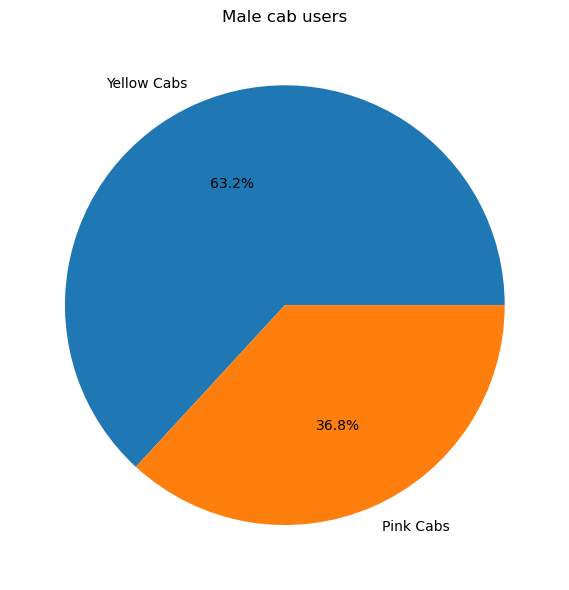

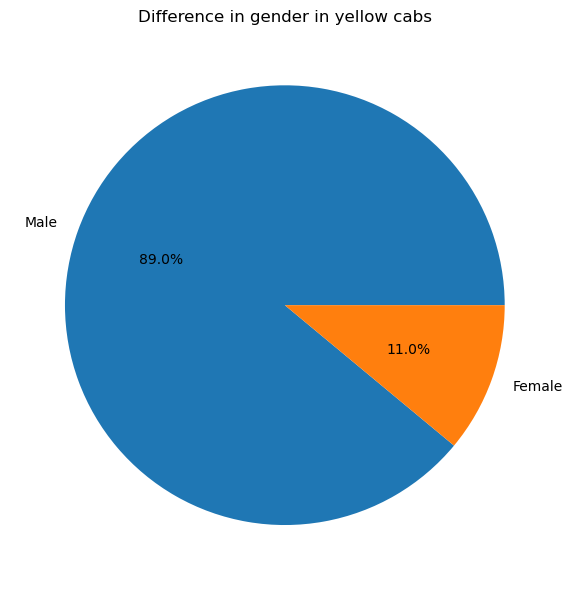

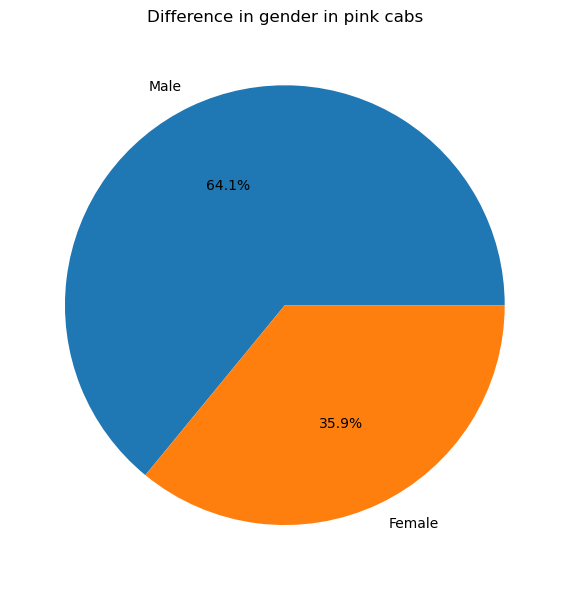

In [56]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.pie(f_diff['Female users'], labels=f_diff['Company'], autopct='%.1f%%')
ax.set_title('Female cab users')
plt.tight_layout()

fig, ax = plt.subplots(figsize=(6, 6))
ax.pie(m_diff['Male users'], labels=m_diff['Company'], autopct='%.1f%%')
ax.set_title('Male cab users')
plt.tight_layout()

fig, ax = plt.subplots(figsize=(6, 6))
ax.pie(y_diff['Users'], labels=y_diff['Gender'], autopct='%.1f%%')
ax.set_title('Difference in gender in yellow cabs')
plt.tight_layout()

fig, ax = plt.subplots(figsize=(6, 6))
ax.pie(p_diff['Users'], labels=p_diff['Gender'], autopct='%.1f%%')
ax.set_title('Difference in gender in pink cabs')
plt.tight_layout()



In [57]:
p_profit = df_pink['Profit'].sum()
y_profit = df_yellow['Profit'].sum()

print(p_profit,y_profit)

prof = df['Profit'].sum()
print(prof)

d = {'Company': ['Yellow Cabs', 'Pink Cabs'], 'Profit': [y_profit, p_profit]}
f_diff = pd.DataFrame(data=d)

5307328.3209999995 44020373.17079999
49327701.4918


### Assumption: 
Since yellow cab has higher popularity, the profit index that yellow cabs have should be higher than that of pink cabs.

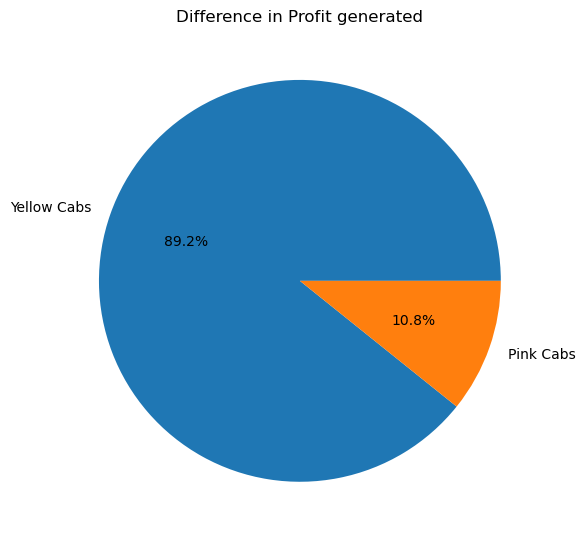

In [58]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.pie(f_diff['Profit'], labels=f_diff['Company'], autopct='%.1f%%')
ax.set_title('Difference in Profit generated')
plt.tight_layout()

#### Seeing that the profit is significantly higher, while the unique customers' difference is marginal for yellow and pink cabs, the assumption is that yellow cabs have a more loyal customer base. 

H0: Yellow cabs have a loyal customer base.                         
H1: Yellow cabs do not have a loyal customer base.

In [59]:
d = {'Company': ['Yellow Cabs', 'Pink Cabs'], 'Users': [df_yellow['Customer ID'].count(), df_pink['Customer ID'].count()]}
f_diff = pd.DataFrame(data=d)

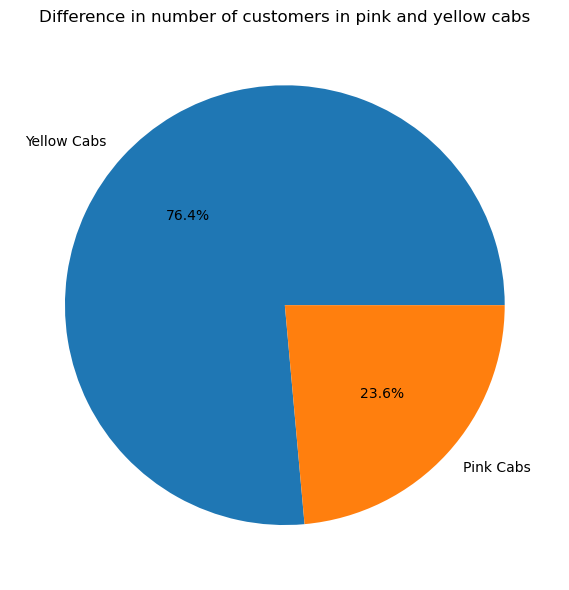

In [60]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.pie(f_diff['Users'], labels=f_diff['Company'], autopct='%.1f%%')
ax.set_title('Difference in number of customers in pink and yellow cabs')
plt.tight_layout()

### H0: Yellow cabs has more loyal users than pink cabs 

As seen above, yellow cabs' user count is significantly higher than that of pink cabs. Even though the Unique customer IDs' comparision was comparable, and had a very low difference. It can be said that yellow cabs has a more loyal user base than that of pink cabs. 

### Assumption: 

As the number of users are comparatively higher in New York, the number of male and female users will also be higher in new york. 

H0: Male and female users are high in New York                       
H1: Male and female users are not high in New York


In [61]:
df_fe = df.loc[df['Gender'] == 'Female']

In [62]:
df_fe

,Company,Customer ID,Gender,KM Travelled,Profit,City
55709,Pink Cab,20645,Female,22.00,-50.3400,SAN DIEGO CA
55710,Yellow Cab,20645,Female,20.37,120.3692,SAN DIEGO CA
55711,Yellow Cab,20645,Female,18.40,9.0880,SAN DIEGO CA
55712,Yellow Cab,20645,Female,6.65,33.6120,SAN DIEGO CA
55713,Pink Cab,20645,Female,28.50,106.7900,SAN DIEGO CA
...,...,...,...,...,...,...
359379,Yellow Cab,50215,Female,31.92,179.9156,PITTSBURGH PA
359384,Yellow Cab,45772,Female,35.70,35.6380,SACRAMENTO CA
359386,Yellow Cab,36141,Female,21.42,67.2972,SEATTLE WA
359387,Yellow Cab,38520,Female,16.66,47.2656,SEATTLE WA


In [63]:
ab = []

for i in df_fe['City'].unique():
    de = df_fe.loc[df_fe['City'] == i]
    ab.append((i, de.count()[1]))
    

len(ab)

19

In [64]:
de = {}
for i in range(len(ab)):
    da = {ab[i][0]: ab[i][1]}
    de.update(da)

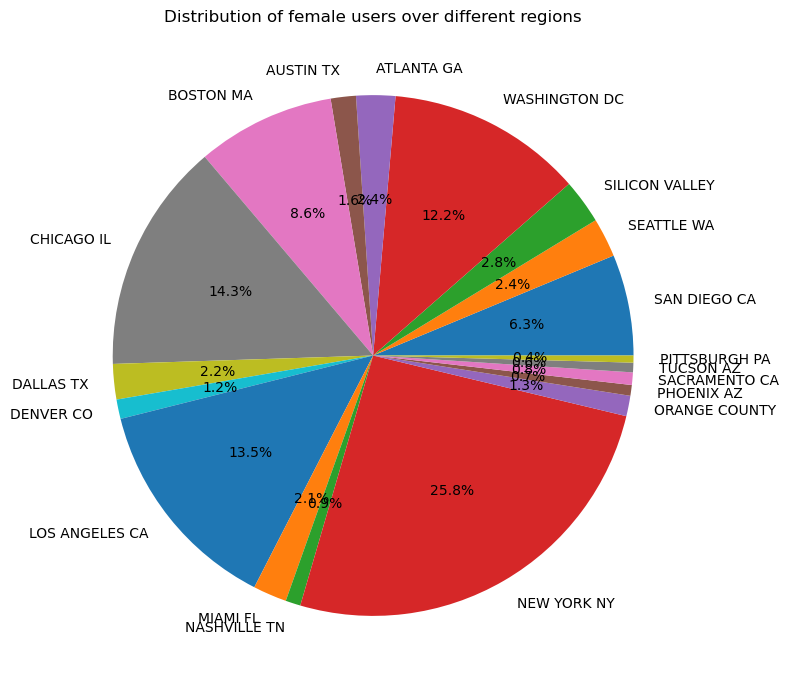

In [65]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(de.values(), labels=de.keys(), autopct='%.1f%%')
ax.set_title('Distribution of female users over different regions')
plt.tight_layout()

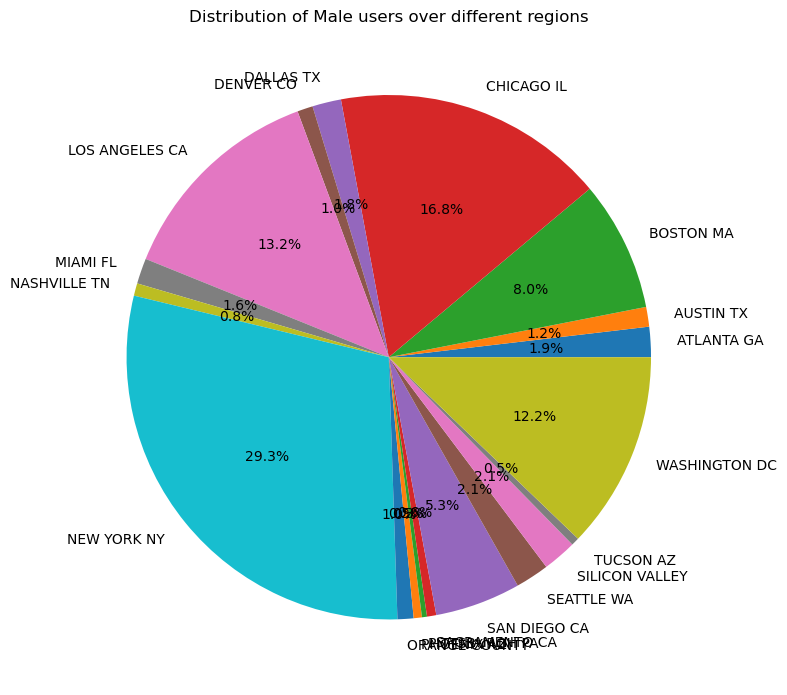

In [66]:
df_m = df.loc[df['Gender'] == 'Male']
ab = []

for i in df_m['City'].unique():
    de = df_m.loc[df_m['City'] == i]
    ab.append((i, de.count()[1]))

de = {}
for i in range(len(ab)):
    df = {ab[i][0]: ab[i][1]}
    de.update(df)
    
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(de.values(), labels=de.keys(), autopct='%.1f%%')
ax.set_title('Distribution of Male users over different regions')
plt.tight_layout()

## H0: Male and female users are higher in New York

In [67]:
df = main_df[['Company', 'Date of Travel', 'Customer ID']]

In [68]:
df['Year'] = pd.DatetimeIndex(df['Date of Travel']).year
df['Month'] = pd.DatetimeIndex(df['Date of Travel']).month
df

,Company,Date of Travel,Customer ID,Year,Month
0,Pink Cab,06/02/2016,29290,2016,6
1,Yellow Cab,19/08/2018,29290,2018,8
2,Yellow Cab,22/12/2018,29290,2018,12
3,Pink Cab,04/02/2016,27703,2016,4
4,Yellow Cab,20/05/2018,27703,2018,5
...,...,...,...,...,...
359387,Yellow Cab,05/02/2018,38520,2018,5
359388,Yellow Cab,01/02/2018,12490,2018,1
359389,Yellow Cab,02/02/2018,41414,2018,2
359390,Yellow Cab,04/02/2018,41677,2018,4


In [69]:
df_pink = df.loc[df['Company'] == 'Pink Cab']
df_yellow = df.loc[df['Company'] != 'Pink Cab']

In [70]:
ab = []
for i in df_pink['Month'].unique():
    de = df_pink.loc[df_pink['Month'] == i]
    ab.append((i, de.count()[1]))

de = {}
for i in range(len(ab)):
    da = {ab[i][0]: ab[i][1]}
    de.update(da)

In [71]:
ac = []
for i in df_yellow['Month'].unique():
    dd = df_yellow.loc[df_yellow['Month'] == i]
    ac.append((i, dd.count()[1]))

db = {}
for i in range(len(ac)):
    dp = {ac[i][0]: ab[i][1]}
    db.update(dp)
    
df

,Company,Date of Travel,Customer ID,Year,Month
0,Pink Cab,06/02/2016,29290,2016,6
1,Yellow Cab,19/08/2018,29290,2018,8
2,Yellow Cab,22/12/2018,29290,2018,12
3,Pink Cab,04/02/2016,27703,2016,4
4,Yellow Cab,20/05/2018,27703,2018,5
...,...,...,...,...,...
359387,Yellow Cab,05/02/2018,38520,2018,5
359388,Yellow Cab,01/02/2018,12490,2018,1
359389,Yellow Cab,02/02/2018,41414,2018,2
359390,Yellow Cab,04/02/2018,41677,2018,4


In [72]:
plot1 = df[df['Company']=='Yellow Cab'].groupby('Month').count()
plot2 = df[df['Company']=='Pink Cab'].groupby('Month').count()

In [73]:
plot1['Company'][1]

30508

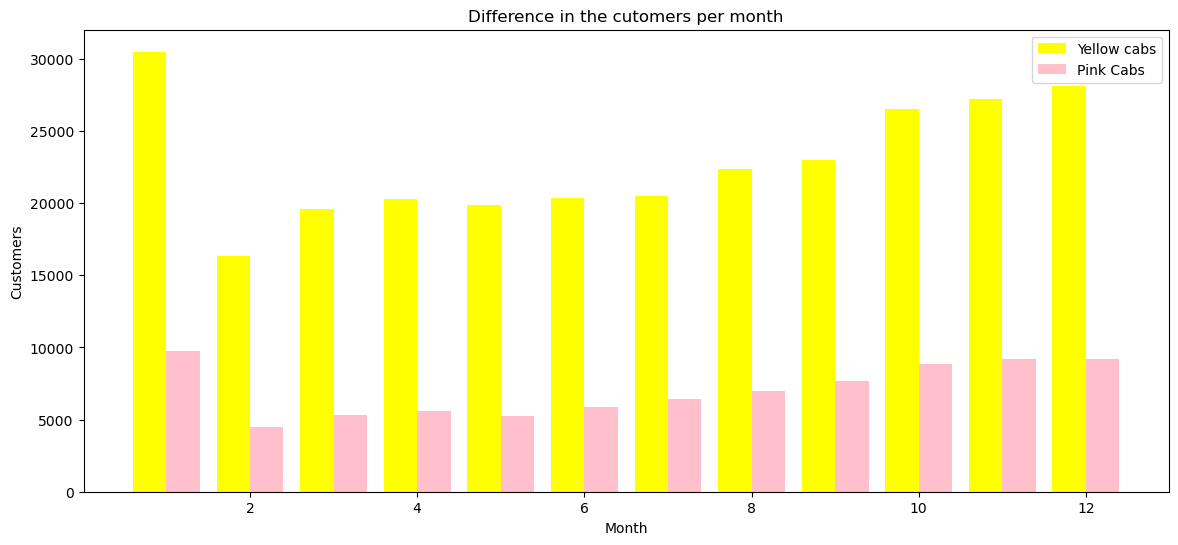

In [74]:
plt.figure(figsize=(14,6))
ax = plt.subplot(111)
ax.bar(plot1.index-0.2, plot1['Company'], width=0.4, color='yellow',label='Yellow cabs')
ax.bar(plot1.index+0.2, plot2['Company'], width=0.4, color='pink',label='Pink Cabs')
plt.ylabel('Customers')
plt.xlabel('Month')
plt.title('Difference in the cutomers per month')
plt.legend()
plt.show()

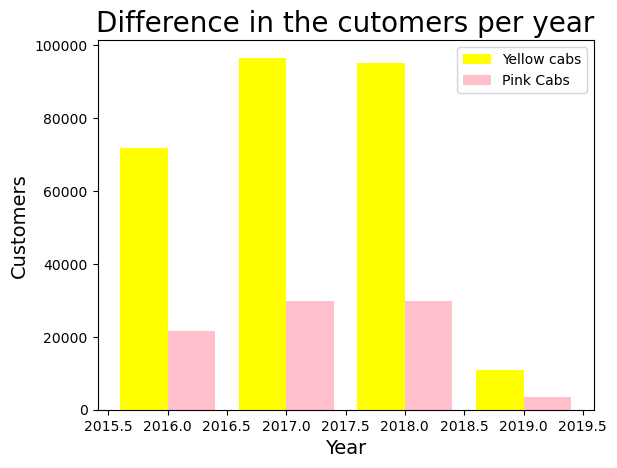

In [75]:
plot1 = df[df['Company']=='Yellow Cab'].groupby('Year').count()
plot2 = df[df['Company']=='Pink Cab'].groupby('Year').count()
ax = plt.subplot(111)
ax.bar(plot1.index-0.2, plot1['Company'], width=0.4, color='yellow',label='Yellow cabs')
ax.bar(plot1.index+0.2, plot2['Company'], width=0.4, color='pink',label='Pink Cabs')
plt.ylabel('Customers', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.title('Difference in the cutomers per year', fontsize=20)
plt.legend()
plt.show()

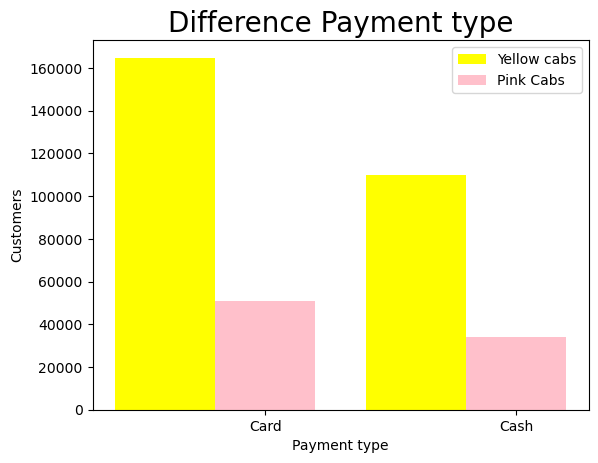

In [76]:
plot1 = main_df[main_df['Company']=='Yellow Cab'].groupby('Payment_Mode').count()
plot2 = main_df[main_df['Company']=='Pink Cab'].groupby('Payment_Mode').count()

ax = plt.subplot(111)
n = np.arange(1,3)
ax.bar(n-0.2, plot1['Company'], width=0.4, color='yellow', tick_label = ['Card','Cash'], label='Yellow cabs')
ax.bar(n+0.2, plot2['Company'], width=0.4, color='pink', tick_label = ['Card','Cash'], label='Pink Cabs')
plt.ylabel('Customers')
plt.xlabel('Payment type')
plt.title('Difference Payment type', fontsize = 20)
plt.legend()
plt.show()

In [77]:
dupe = main_df.copy()

In [78]:
aa = []
for i in main_df['Age']:
    if (i>18 and i<33):
        aa.append('GenX')
    elif (i>32 and i<53):
        aa.append('Millennial')
    else:
        aa.append('Boomer')

In [79]:
dupe['Age Category'] = aa

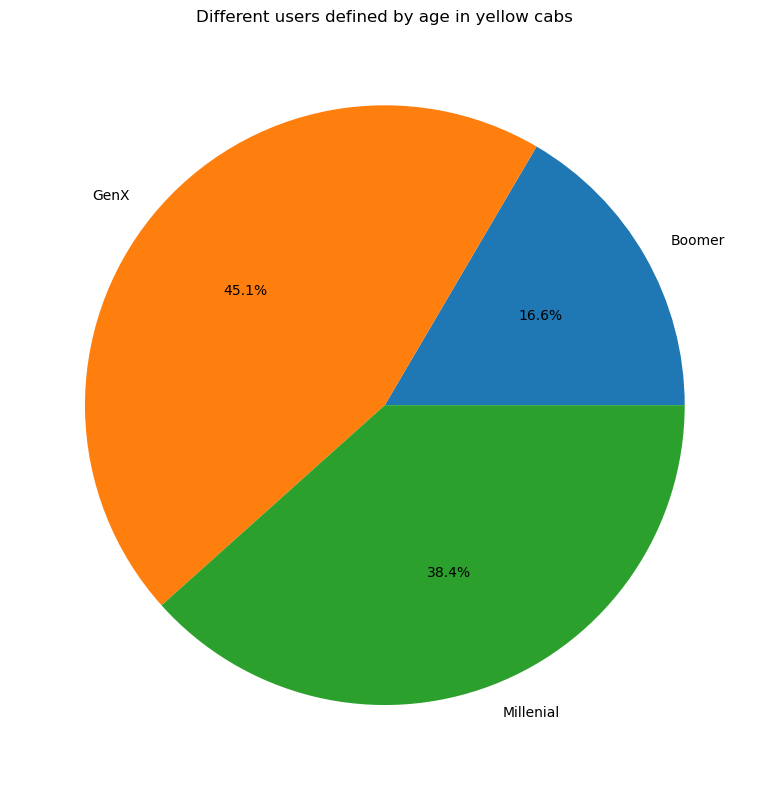

In [80]:
plot1 = dupe[dupe['Company']=='Yellow Cab'].groupby('Age Category').count()

fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(plot1['Company'], labels=['Boomer', 'GenX', 'Millenial'], autopct='%.1f%%')
ax.set_title('Different users defined by age in yellow cabs')
plt.tight_layout()

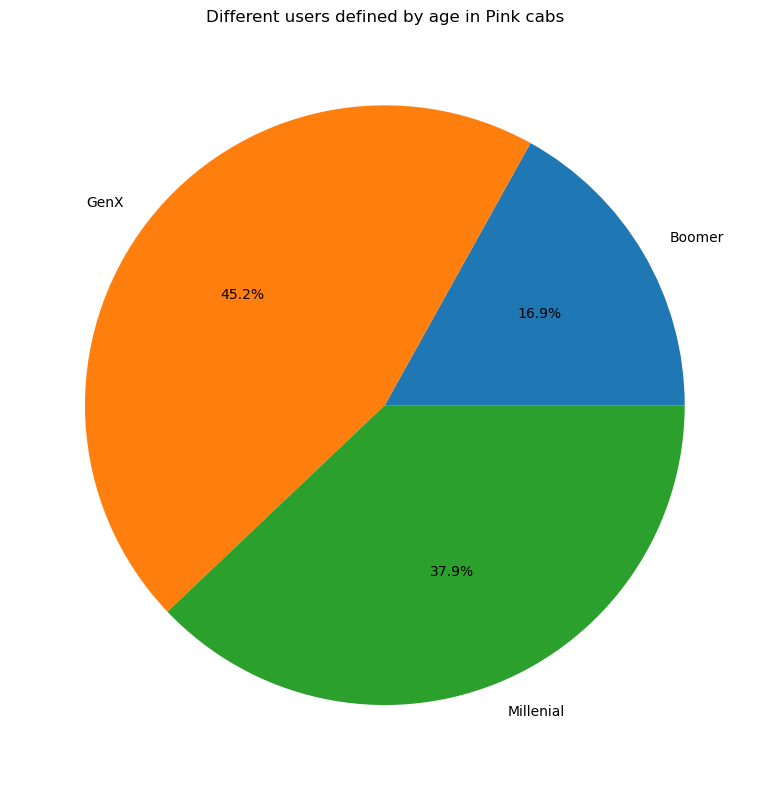

In [81]:
plot1 = dupe[dupe['Company']=='Pink Cab'].groupby('Age Category').count()

fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(plot1['Company'], labels=['Boomer', 'GenX', 'Millenial'], autopct='%.1f%%')
ax.set_title('Different users defined by age in Pink cabs')
plt.tight_layout()

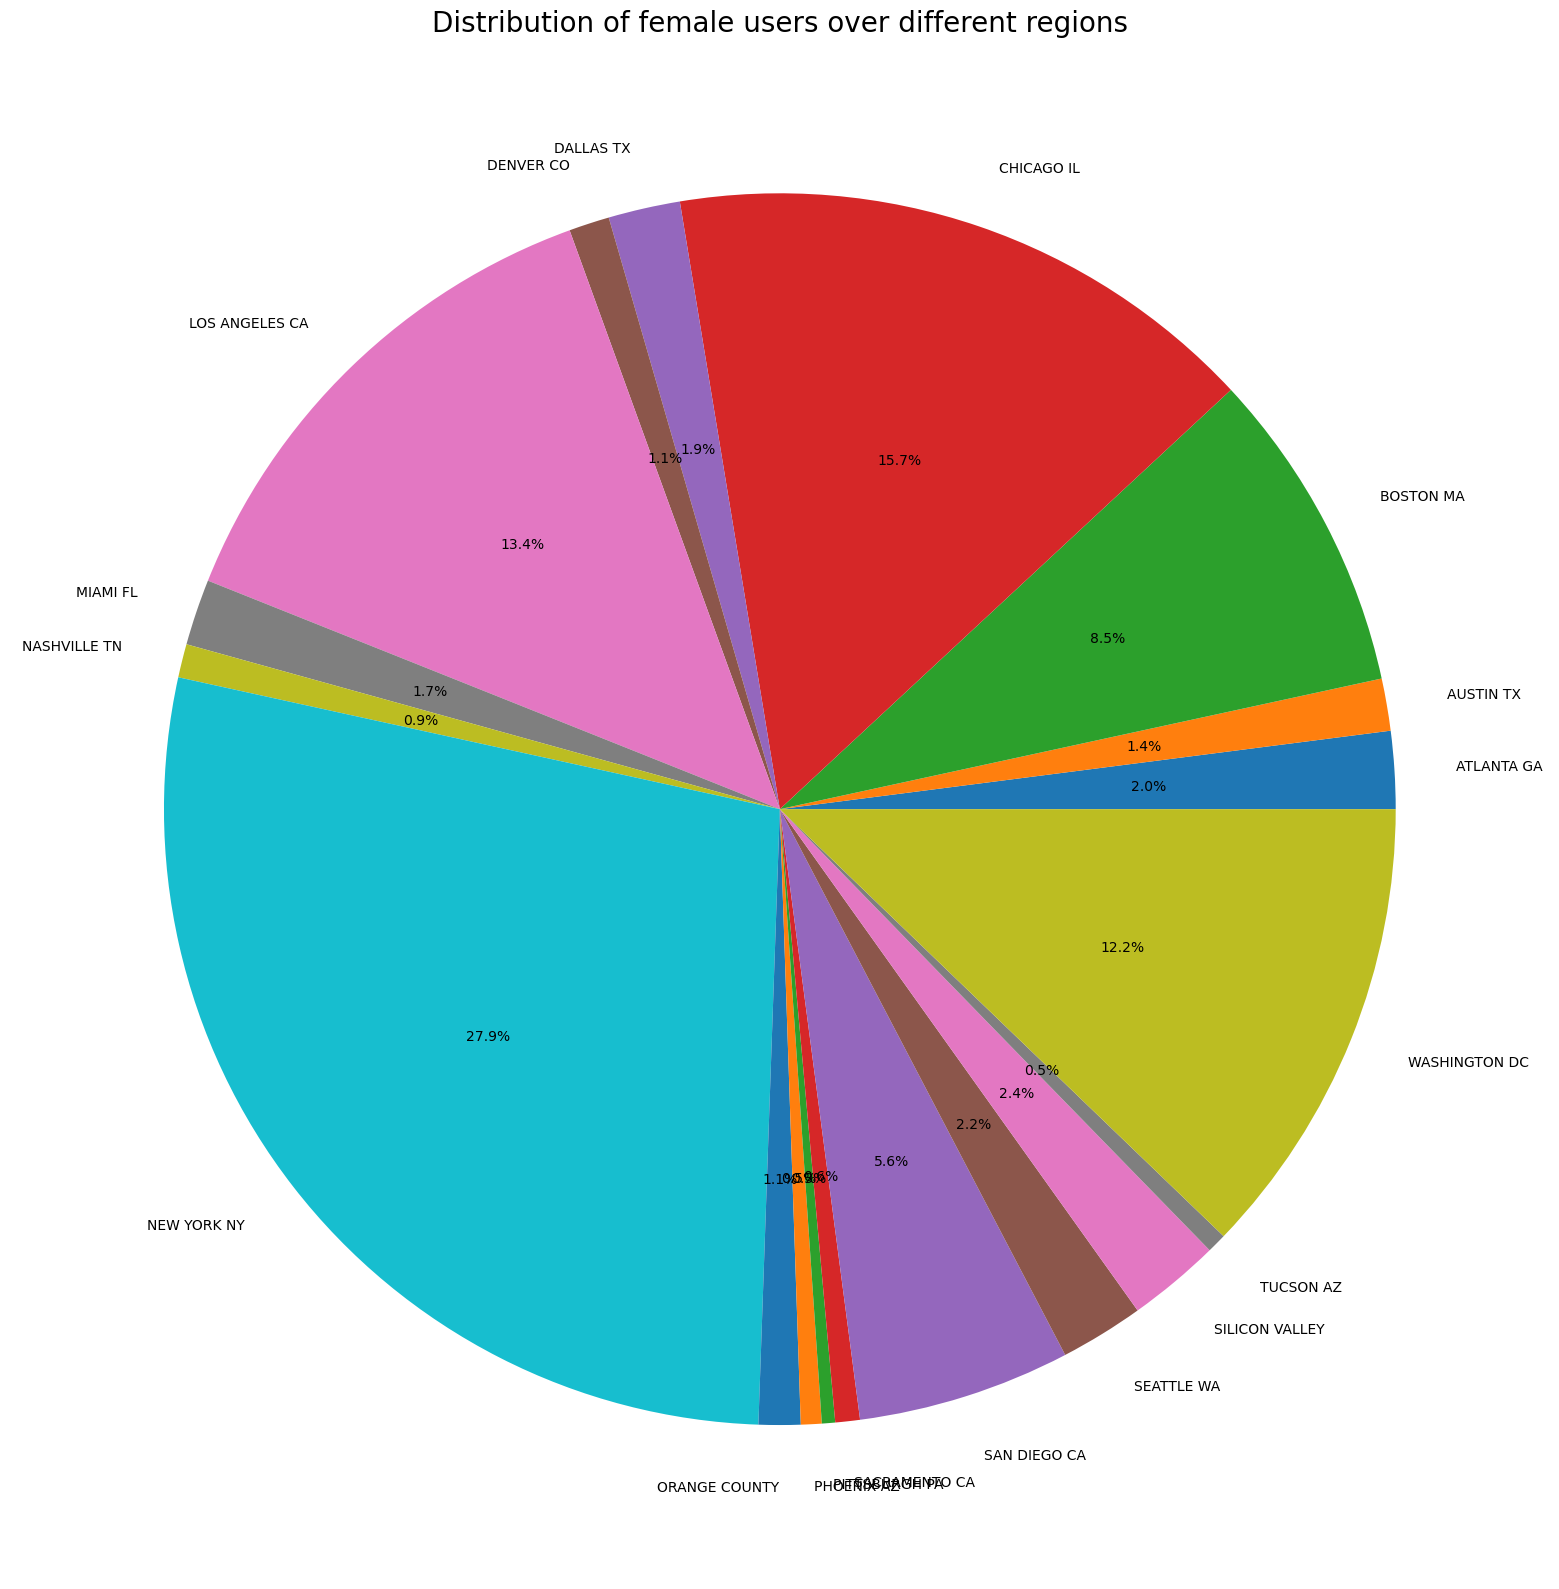

In [82]:
plot1 = dupe[dupe['Age Category']=='GenX'].groupby('City').count()

fig, ax = plt.subplots(figsize=(16, 16))
ax.pie(plot1['Company'], labels=plot1.index, autopct='%1.1f%%')
ax.set_title('Distribution of female users over different regions', fontsize = 20)
plt.tight_layout()

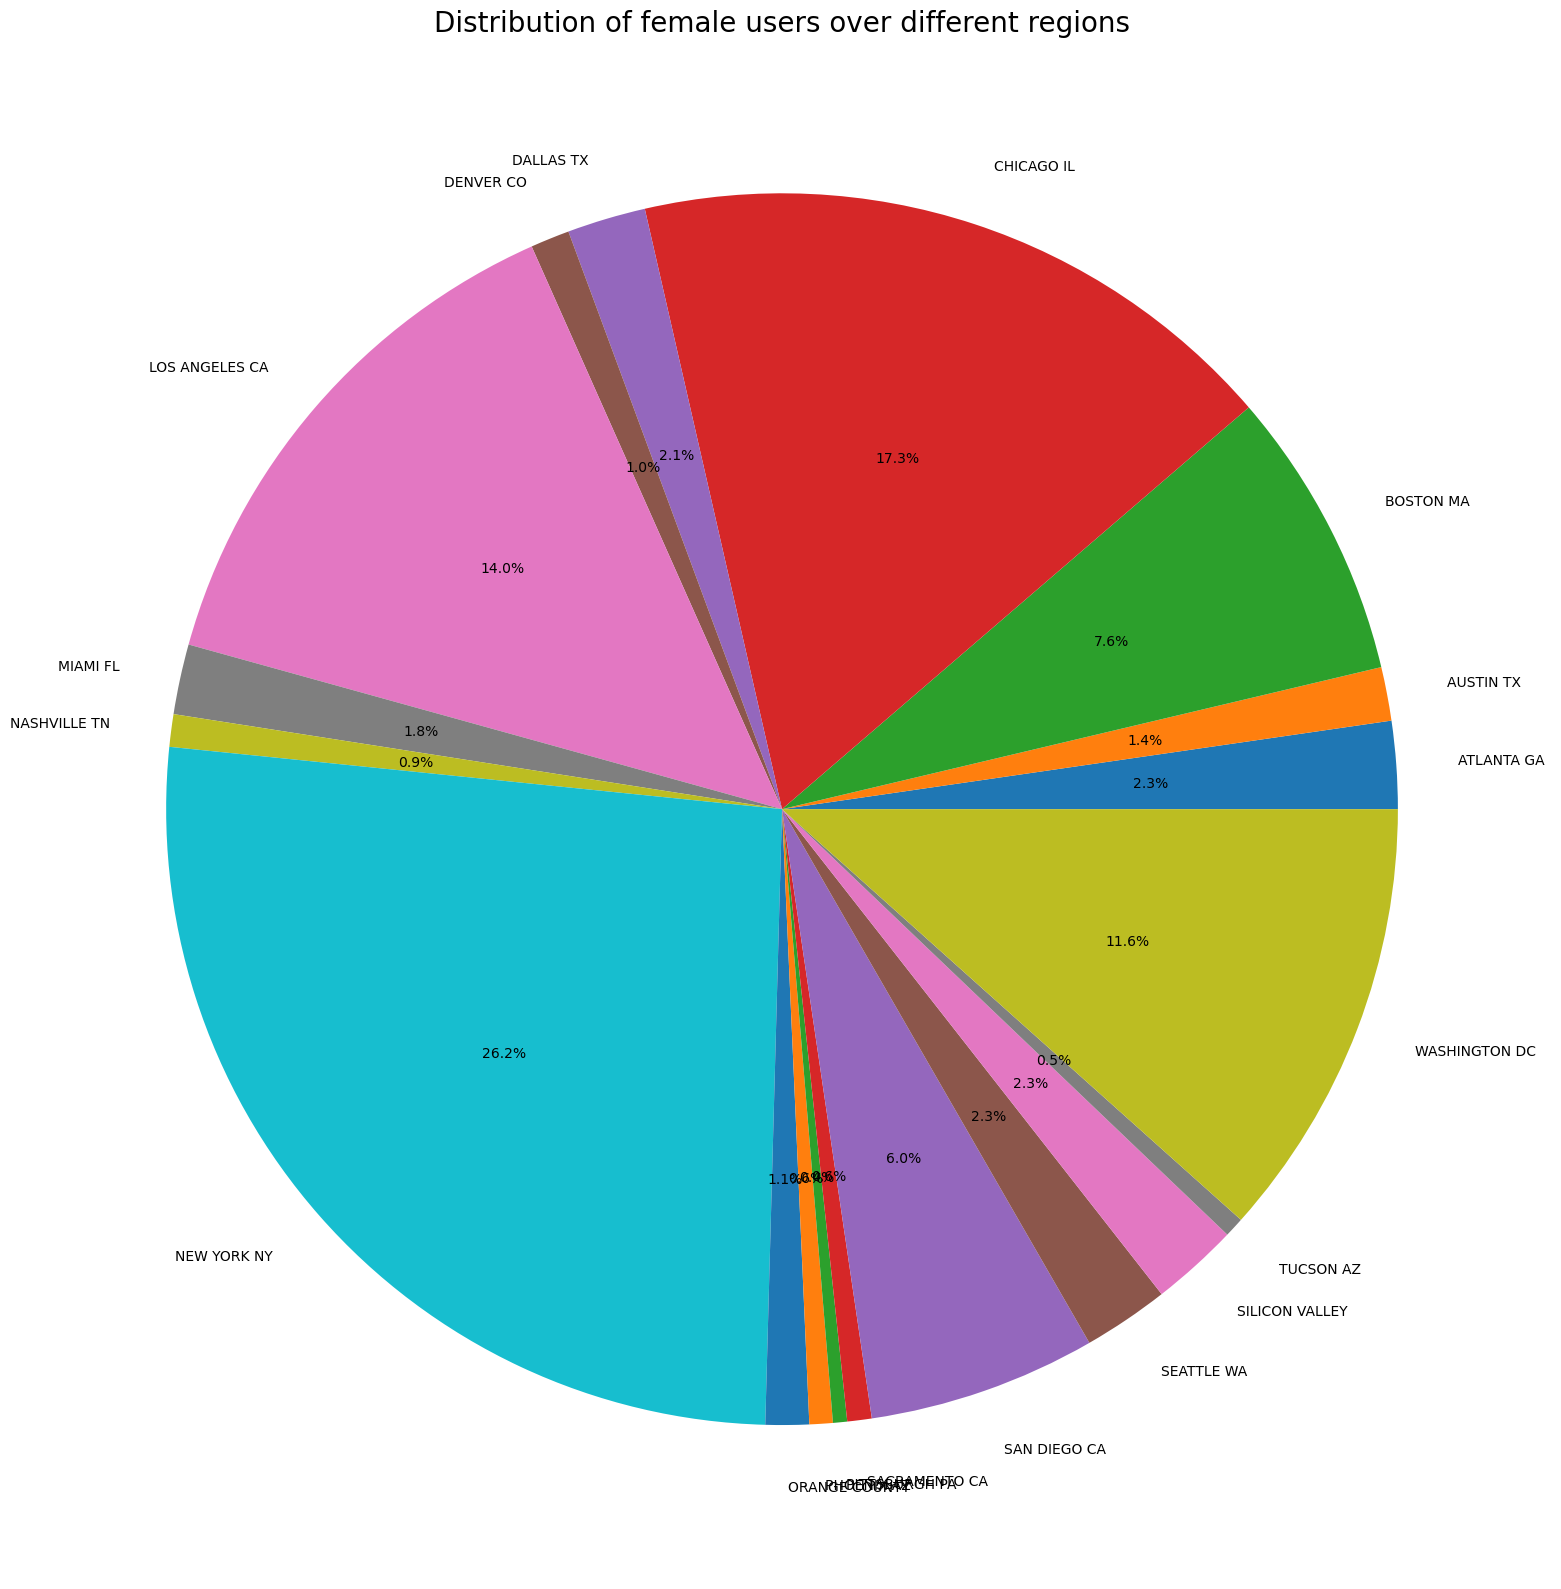

In [83]:
plot1 = dupe[dupe['Age Category']=='Boomer'].groupby('City').count()

fig, ax = plt.subplots(figsize=(16, 16))
ax.pie(plot1['Company'], labels=plot1.index, autopct='%1.1f%%')
ax.set_title('Distribution of female users over different regions', fontsize = 20)
plt.tight_layout()

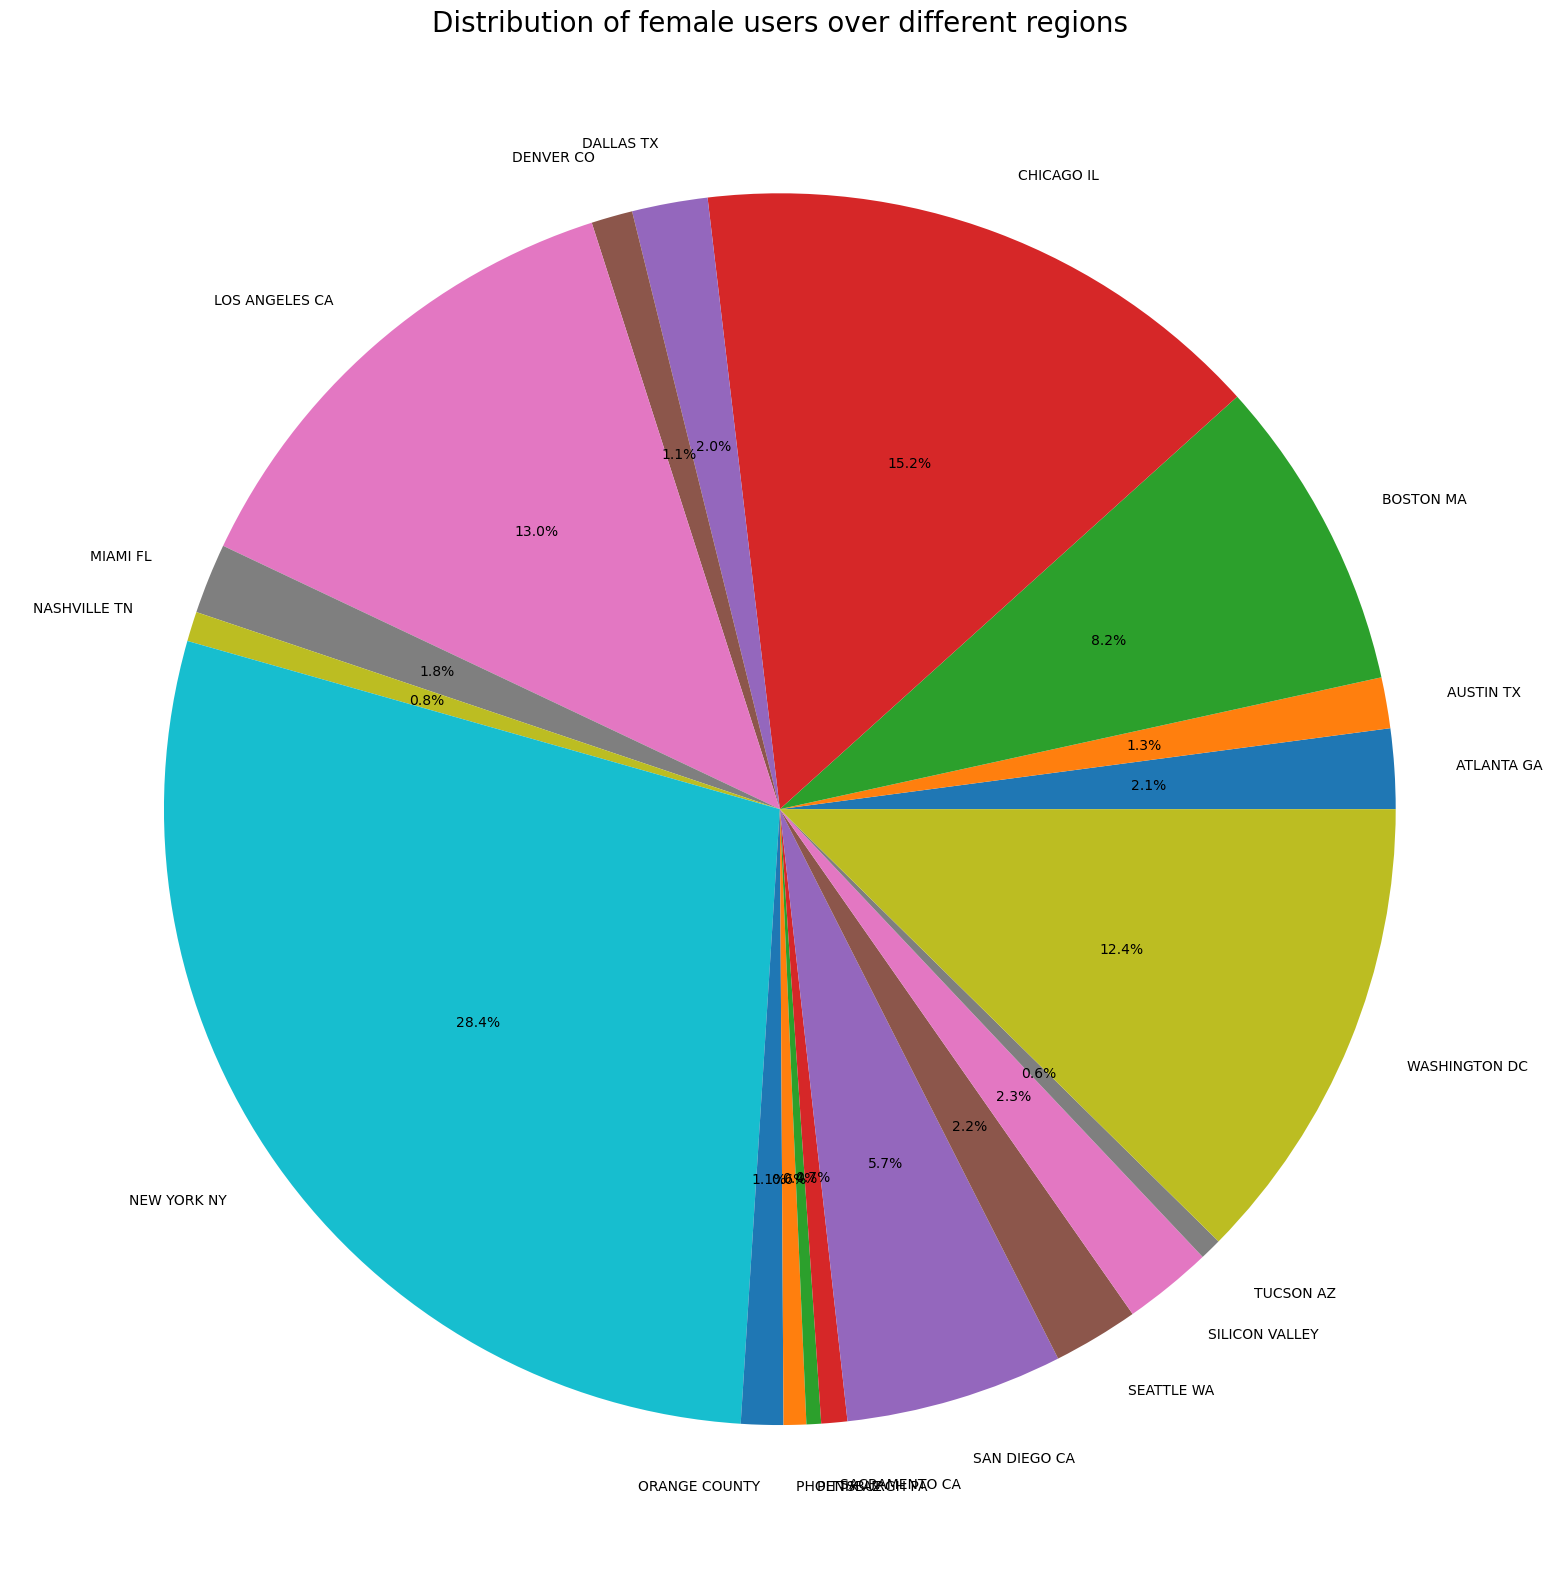

In [84]:
plot1 = dupe[dupe['Age Category']=='Millennial'].groupby('City').count()

fig, ax = plt.subplots(figsize=(16, 16))
ax.pie(plot1['Company'], labels=plot1.index, autopct='%1.1f%%')
ax.set_title('Distribution of female users over different regions', fontsize = 20)
plt.tight_layout()

In [85]:
main_df['Year'] = df['Year']
main_df['Month'] = df['Month']

In [86]:
main_df

,Customer ID,Gender,Age,Income (USD/Month),Transaction ID,Payment_Mode,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Profit,Year,Month
0,29290,Male,28,10813,10000011,Card,06/02/2016,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,57.3150,2016,6
1,29290,Male,28,10813,10351127,Cash,19/08/2018,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,281.2772,2018,8
2,29290,Male,28,10813,10412921,Card,22/12/2018,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,194.6480,2018,12
3,27703,Male,27,9237,10000012,Card,04/02/2016,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,23.6660,2016,4
4,27703,Male,27,9237,10320494,Card,20/05/2018,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,253.9808,2018,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,38520,Female,42,19417,10439790,Card,05/02/2018,Yellow Cab,SEATTLE WA,16.66,261.18,213.9144,47.2656,2018,5
359388,12490,Male,33,18713,10439799,Cash,01/02/2018,Yellow Cab,SILICON VALLEY,13.72,277.97,172.8720,105.0980,2018,1
359389,41414,Male,38,3960,10439838,Card,02/02/2018,Yellow Cab,TUCSON AZ,19.00,303.77,232.5600,71.2100,2018,2
359390,41677,Male,23,19454,10439840,Cash,04/02/2018,Yellow Cab,TUCSON AZ,5.60,92.42,70.5600,21.8600,2018,4


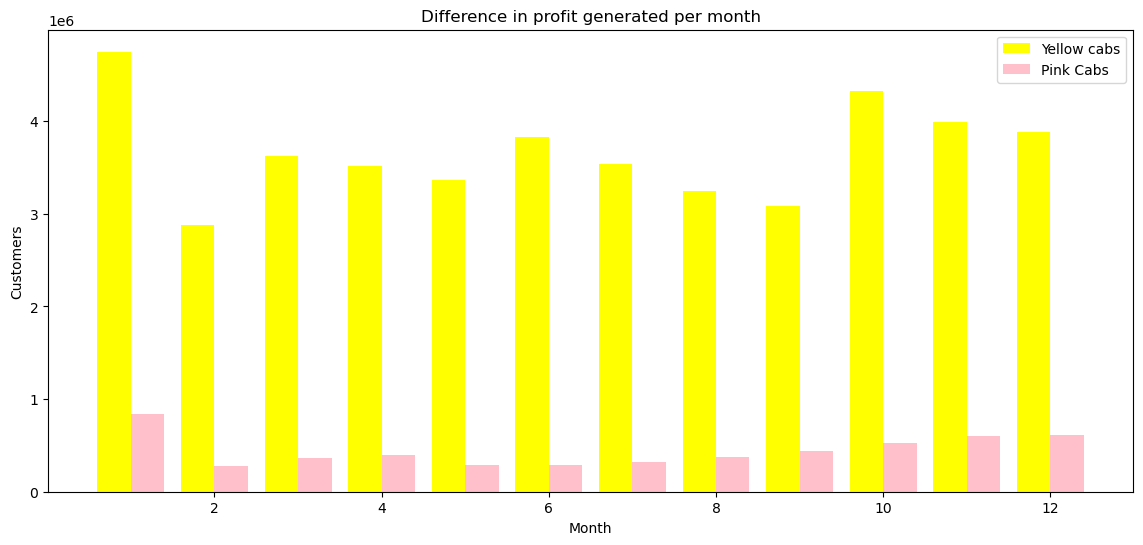

In [87]:
plot1 = main_df[main_df['Company']=='Yellow Cab'].groupby('Month')['Profit'].agg('sum')
plot2 = main_df[main_df['Company']=='Pink Cab'].groupby('Month')['Profit'].agg('sum')

plot2

plt.figure(figsize=(14,6))
ax = plt.subplot(111)
ax.bar(plot1.index-0.2, plot1, width=0.4, color='yellow',label='Yellow cabs')
ax.bar(plot1.index+0.2, plot2, width=0.4, color='pink',label='Pink Cabs')
plt.ylabel('Customers')
plt.xlabel('Month')
plt.title('Difference in profit generated per month')
plt.legend()
plt.show()

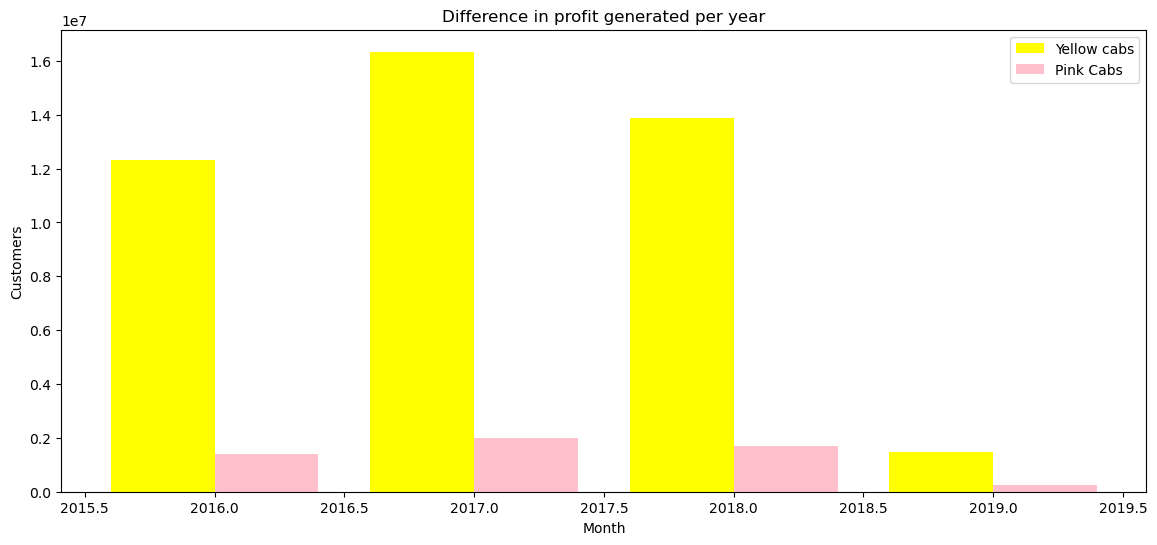

In [88]:
plot1 = main_df[main_df['Company']=='Yellow Cab'].groupby('Year')['Profit'].agg('sum')
plot2 = main_df[main_df['Company']=='Pink Cab'].groupby('Year')['Profit'].agg('sum')

plot2

plt.figure(figsize=(14,6))
ax = plt.subplot(111)
ax.bar(plot1.index-0.2, plot1, width=0.4, color='yellow',label='Yellow cabs')
ax.bar(plot1.index+0.2, plot2, width=0.4, color='pink',label='Pink Cabs')
plt.ylabel('Customers')
plt.xlabel('Month')
plt.title('Difference in profit generated per year')
plt.legend()
plt.show()

In [89]:
main_df['Avg Km'] = main_df['Cost of Trip']/main_df['Price Charged']

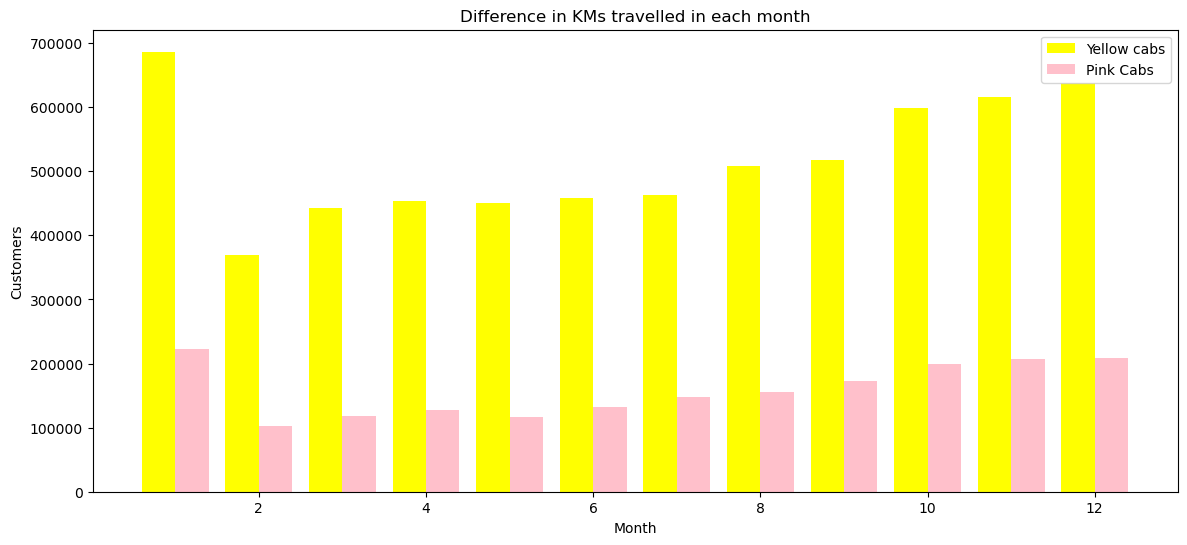

In [90]:
plot1 = main_df[main_df['Company']=='Yellow Cab'].groupby('Month')['KM Travelled'].agg('sum')
plot2 = main_df[main_df['Company']=='Pink Cab'].groupby('Month')['KM Travelled'].agg('sum')


plt.figure(figsize=(14,6))
ax = plt.subplot(111)
ax.bar(plot1.index-0.2, plot1, width=0.4, color='yellow',label='Yellow cabs')
ax.bar(plot1.index+0.2, plot2, width=0.4, color='pink',label='Pink Cabs')
plt.ylabel('Customers')
plt.xlabel('Month')
plt.title('Difference in KMs travelled in each month')
plt.legend()
plt.show()

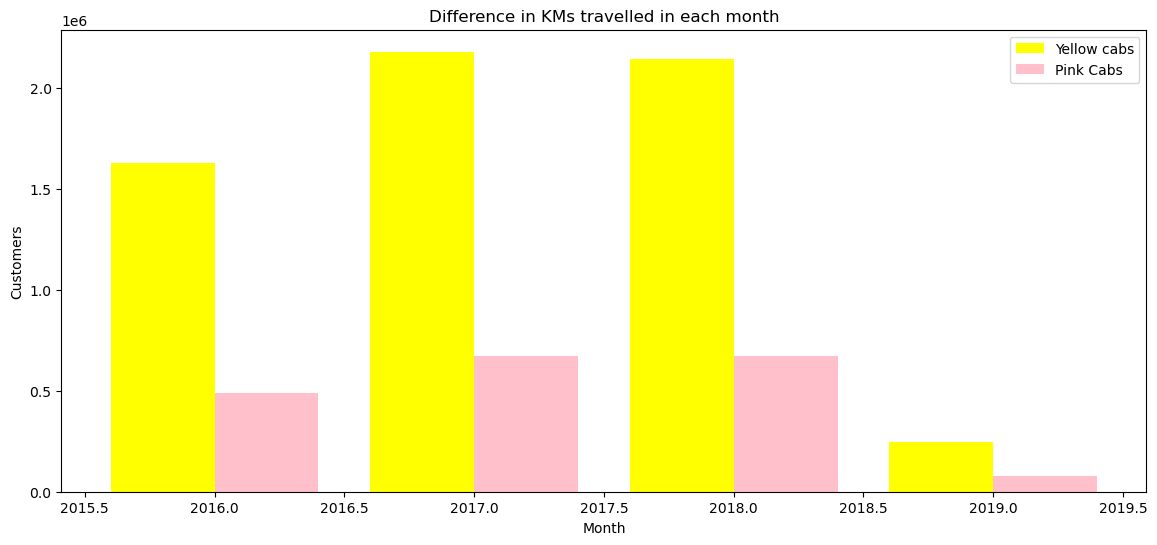

In [91]:
plot1 = main_df[main_df['Company']=='Yellow Cab'].groupby('Year')['KM Travelled'].agg('sum')
plot2 = main_df[main_df['Company']=='Pink Cab'].groupby('Year')['KM Travelled'].agg('sum')


plt.figure(figsize=(14,6))
ax = plt.subplot(111)
ax.bar(plot1.index-0.2, plot1, width=0.4, color='yellow',label='Yellow cabs')
ax.bar(plot1.index+0.2, plot2, width=0.4, color='pink',label='Pink Cabs')
plt.ylabel('Customers')
plt.xlabel('Month')
plt.title('Difference in KMs travelled in each month')
plt.legend()
plt.show()

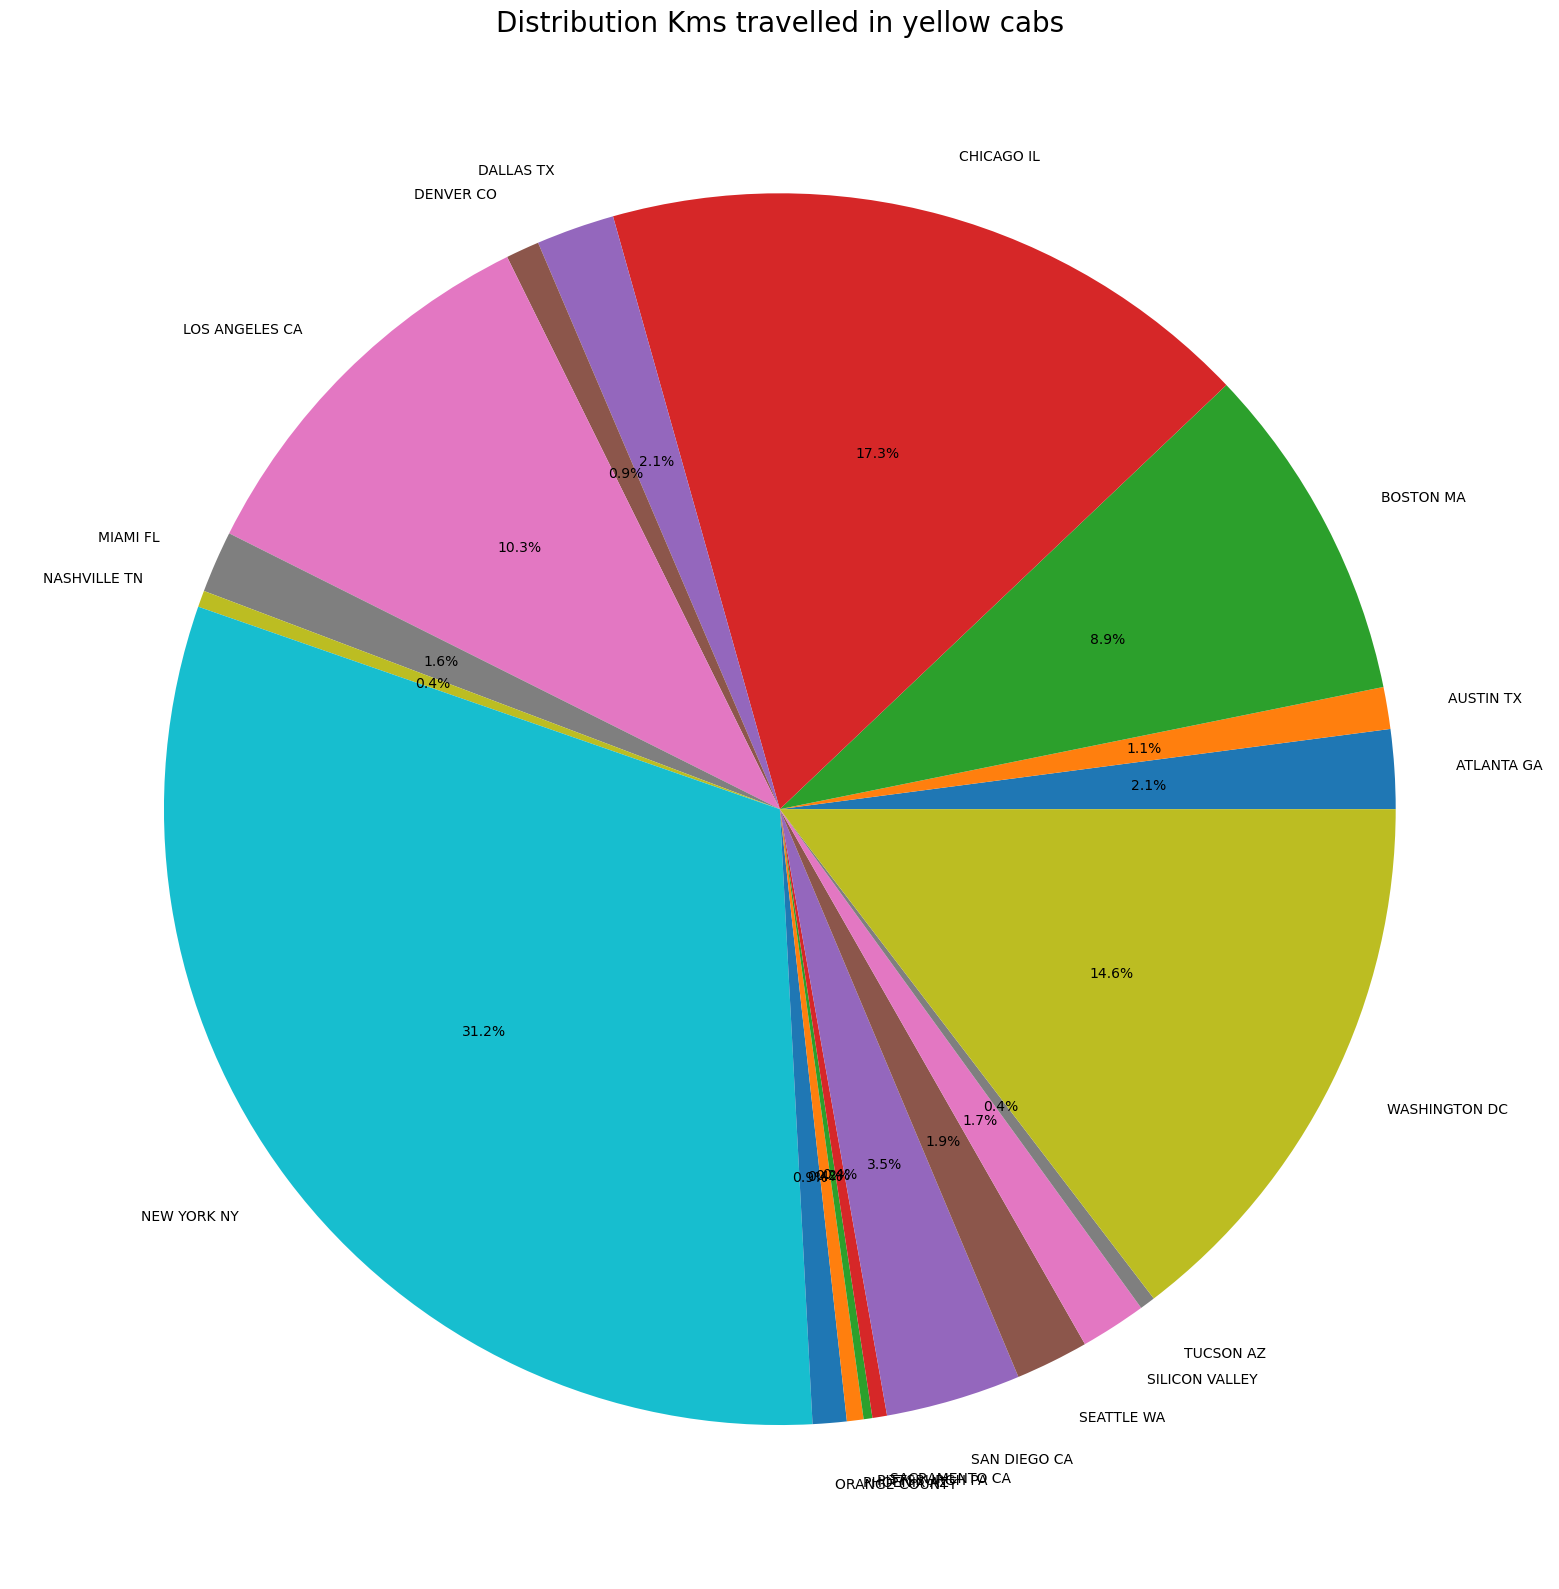

In [92]:
plot1 = main_df[main_df['Company']=='Yellow Cab'].groupby('City')['KM Travelled'].agg(sum)

fig, ax = plt.subplots(figsize=(16, 16))
ax.pie(plot1, labels=plot1.index, autopct='%1.1f%%')
ax.set_title('Distribution Kms travelled in yellow cabs', fontsize = 20)
plt.tight_layout()

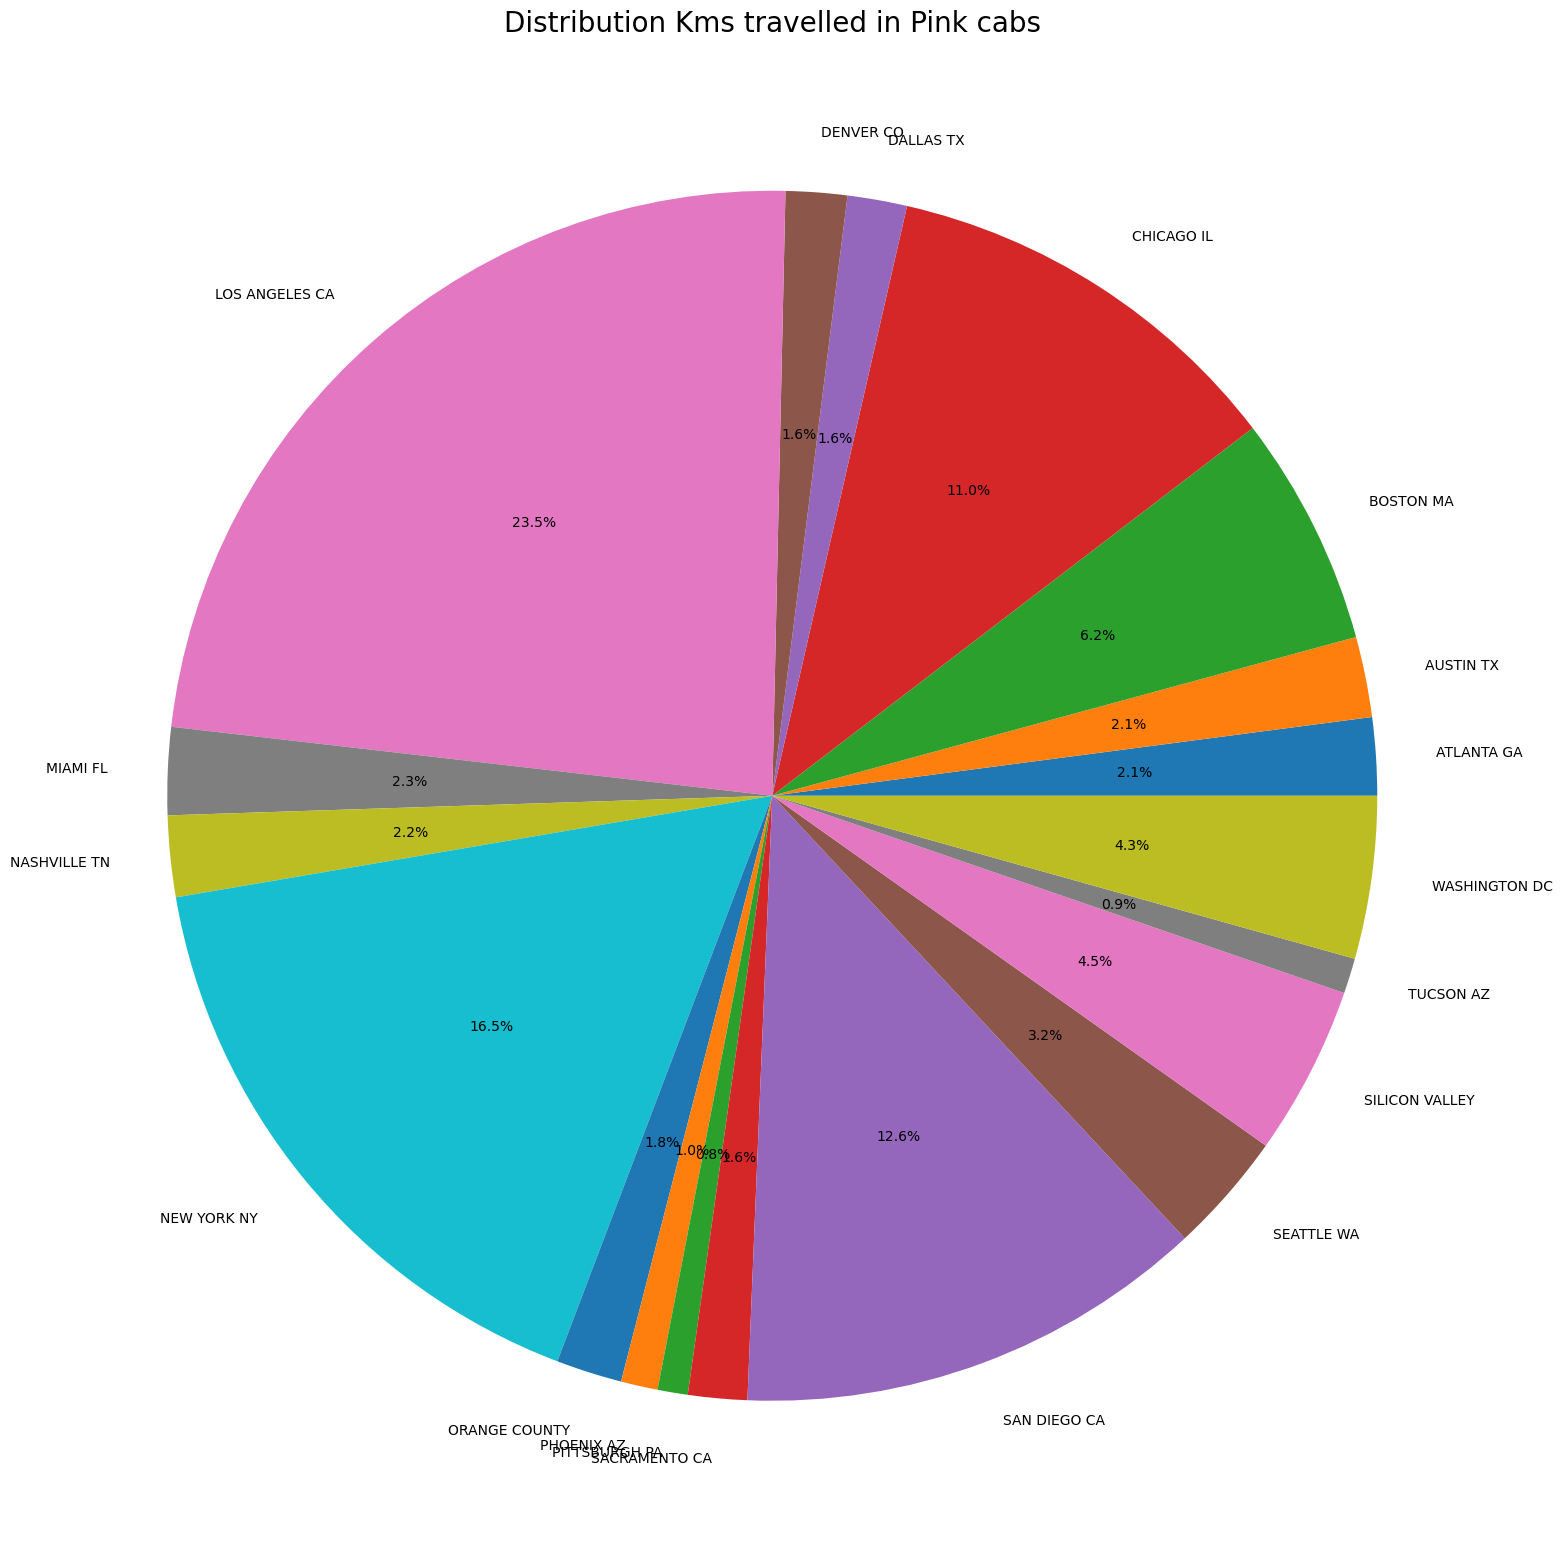

In [93]:
plot1 = main_df[main_df['Company']=='Pink Cab'].groupby('City')['KM Travelled'].agg(sum)

fig, ax = plt.subplots(figsize=(16, 16))
ax.pie(plot1, labels=plot1.index, autopct='%1.1f%%')
ax.set_title('Distribution Kms travelled in Pink cabs', fontsize = 20)
plt.tight_layout()

In [94]:
main_df['Income (USD/Month)'].max()

35000

In [95]:
main_df

,Customer ID,Gender,Age,Income (USD/Month),Transaction ID,Payment_Mode,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Profit,Year,Month,Avg Km
0,29290,Male,28,10813,10000011,Card,06/02/2016,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,57.3150,2016,6,0.845491
1,29290,Male,28,10813,10351127,Cash,19/08/2018,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,281.2772,2018,8,0.530187
2,29290,Male,28,10813,10412921,Card,22/12/2018,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,194.6480,2018,12,0.754248
3,27703,Male,27,9237,10000012,Card,04/02/2016,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,23.6660,2016,4,0.933990
4,27703,Male,27,9237,10320494,Card,20/05/2018,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,253.9808,2018,5,0.647787
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,38520,Female,42,19417,10439790,Card,05/02/2018,Yellow Cab,SEATTLE WA,16.66,261.18,213.9144,47.2656,2018,5,0.819031
359388,12490,Male,33,18713,10439799,Cash,01/02/2018,Yellow Cab,SILICON VALLEY,13.72,277.97,172.8720,105.0980,2018,1,0.621909
359389,41414,Male,38,3960,10439838,Card,02/02/2018,Yellow Cab,TUCSON AZ,19.00,303.77,232.5600,71.2100,2018,2,0.765579
359390,41677,Male,23,19454,10439840,Cash,04/02/2018,Yellow Cab,TUCSON AZ,5.60,92.42,70.5600,21.8600,2018,4,0.763471


In [96]:
aa = []
for i in main_df['Income (USD/Month)']:
    if (i>1999 and i<5999):
        aa.append('Low income')
    elif (i>5999 and i<15000):
        aa.append('Lower Middle income')
    elif (i>14999 and i<29999):
        aa.append('High middle income')
    else:
        aa.append('High income')

In [97]:
dupe['Income'] = aa

In [98]:
dupe

,Customer ID,Gender,Age,Income (USD/Month),Transaction ID,Payment_Mode,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Profit,Age Category,Income
0,29290,Male,28,10813,10000011,Card,06/02/2016,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,57.3150,GenX,Lower Middle income
1,29290,Male,28,10813,10351127,Cash,19/08/2018,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,281.2772,GenX,Lower Middle income
2,29290,Male,28,10813,10412921,Card,22/12/2018,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,194.6480,GenX,Lower Middle income
3,27703,Male,27,9237,10000012,Card,04/02/2016,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,23.6660,GenX,Lower Middle income
4,27703,Male,27,9237,10320494,Card,20/05/2018,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,253.9808,GenX,Lower Middle income
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,38520,Female,42,19417,10439790,Card,05/02/2018,Yellow Cab,SEATTLE WA,16.66,261.18,213.9144,47.2656,Millennial,High middle income
359388,12490,Male,33,18713,10439799,Cash,01/02/2018,Yellow Cab,SILICON VALLEY,13.72,277.97,172.8720,105.0980,Millennial,High middle income
359389,41414,Male,38,3960,10439838,Card,02/02/2018,Yellow Cab,TUCSON AZ,19.00,303.77,232.5600,71.2100,Millennial,Low income
359390,41677,Male,23,19454,10439840,Cash,04/02/2018,Yellow Cab,TUCSON AZ,5.60,92.42,70.5600,21.8600,GenX,High middle income


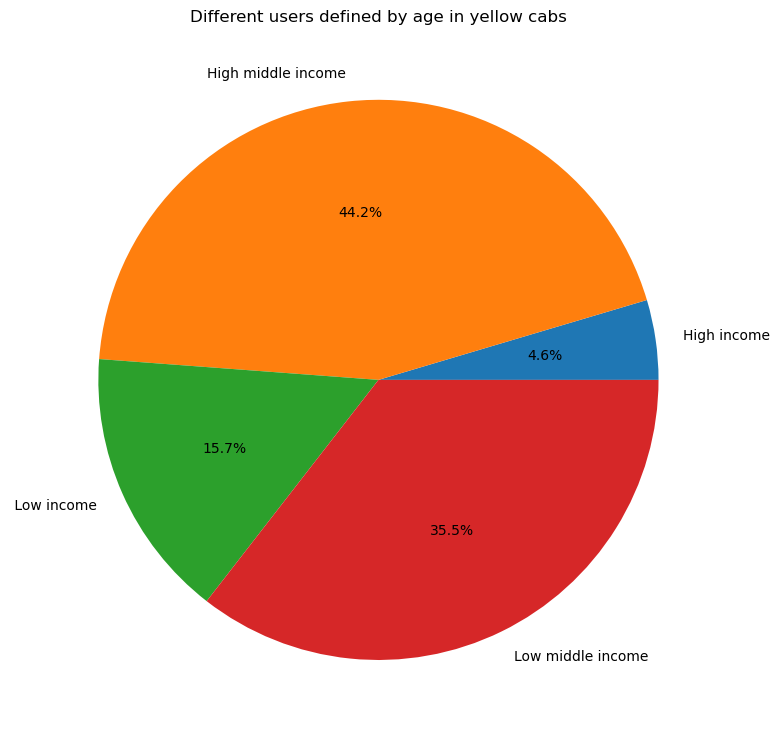

In [99]:
plot1 = dupe[dupe['Company']=='Yellow Cab'].groupby('Income').count()

fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(plot1['Company'], labels = ['High income','High middle income',' Low income','Low middle income'], autopct='%.1f%%')
ax.set_title('Different users defined by age in yellow cabs')
plt.tight_layout()

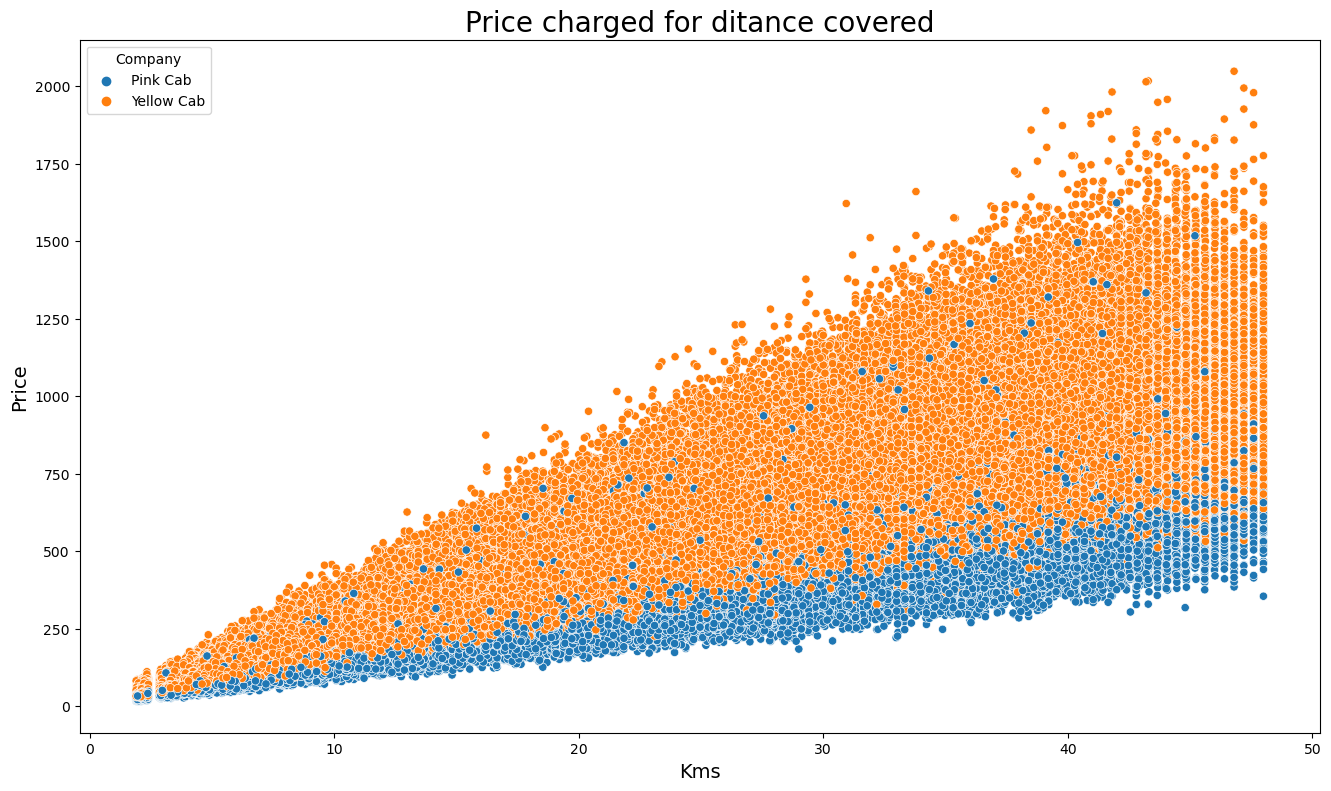

In [100]:
plt.figure(figsize = (16, 9))

sns.scatterplot(data=main_df, x="KM Travelled", y='Price Charged', hue = 'Company')
plt.title('Price charged for ditance covered',fontsize = 20)
plt.ylabel('Price',fontsize = 14)
plt.xlabel('Kms',fontsize = 14)
plt.show()

The above notebook has detailed analysis of the cab companies that exist in USA.            
On primary view:         
Yellow cabs have more cusomers than compared to pink cabs.                                
Yellow cabs have more repeated customers.      
Yellow cabs have travelled more distance. 
Yellow cabs have generated more profit. 
profit for both the cabs are not constant and change every month, and year. 
Users of age group of 18-33 use cabs more.                                                 
Users with middle income use cabs more.   
Males tend to use cabs more. 
New York has the highest number of cab users. 

